<h1>
Amazon Reviews using Sentiment Analysis </h1>

## About the dataset
* This dataset is from https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
* Dataset describes the Amazon products raings/reviews which are given by customers who bought along with customer and product details

# 1. Description 

Each record in the dataset shows a single amazon product review. Here, the reviews are continuous which means more high reviewed products have higher product suggestion. reviews.rating show us the product quality, given by the one who has reviewed it on a 5-point scale.
* This dataset is based on Amazon branded/Amazon manufactured products only, and Customer satisfaction with Amazon products is the main focus here.
* So,The <b>target class</b> is review rating of the products as we want to recommend the products to the similar users based on the rating of product

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
sns.set_style("whitegrid") # Plotting style
%matplotlib inline 

In [2]:
csv = "1429_1.csv"
df = pd.read_csv(csv)
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [3]:
df.shape

(34660, 21)

* There are 34660 number of rows and 21 features in the data set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

# 2. Statistics

In [5]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the descriptive statistics above, we see the following:
1) Average review score of 4.58, with low standard deviation.
 * Most reviews are positive from 2nd quartile onwards.
2. The average for number of reviews helpful (reviews.numHelpful) is 0.6 but has high standard deviation.
* The data are pretty spread out around the mean, and since we can’t have negative people finding something helpful, then this is only on the right tail side.
* The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)
3. The most helpful review was helpful to 814 people

Based on the information above:
* Dropping reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase since these values are floats (for exploratory analysis only).
* Not every category have maximum number of values in comparison to total number of values.
* reviews.text category has minimum missing data (34659/34660).

<B>ASIN (Amazon Standard Identification Number) is one of the unique product identifiers used for managing the Amazon product catalog. In a technical sense, it's a 10-digit code made up of numbers and letters</B>

* Cleaning up the name column by referencing asins (unique products) since there are 7000 missing values.

In [6]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [7]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


## 2.1. Calculating highest rated product

In [8]:
print('-----Highly rated product-----')
print(df.groupby('asins')['reviews.rating'].count().sort_values(ascending=False).head())

-----Highly rated product-----
asins
B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
Name: reviews.rating, dtype: int64


## 2.2. Calculating average rated products

In [9]:
print("-----Average rating based on each product-----")
avgrating = pd.DataFrame(df.groupby('asins')['reviews.rating'].mean())
print(avgrating.head())

-----Average rating based on each product-----
            reviews.rating
asins                     
B002Y27P3M             NaN
B002Y27P6Y        3.500000
B005PB2T0S        4.000000
B005PB2T2Q        3.666667
B006GWO5NE        4.875000


# 3. Visualizing the distributions of numerical variables:

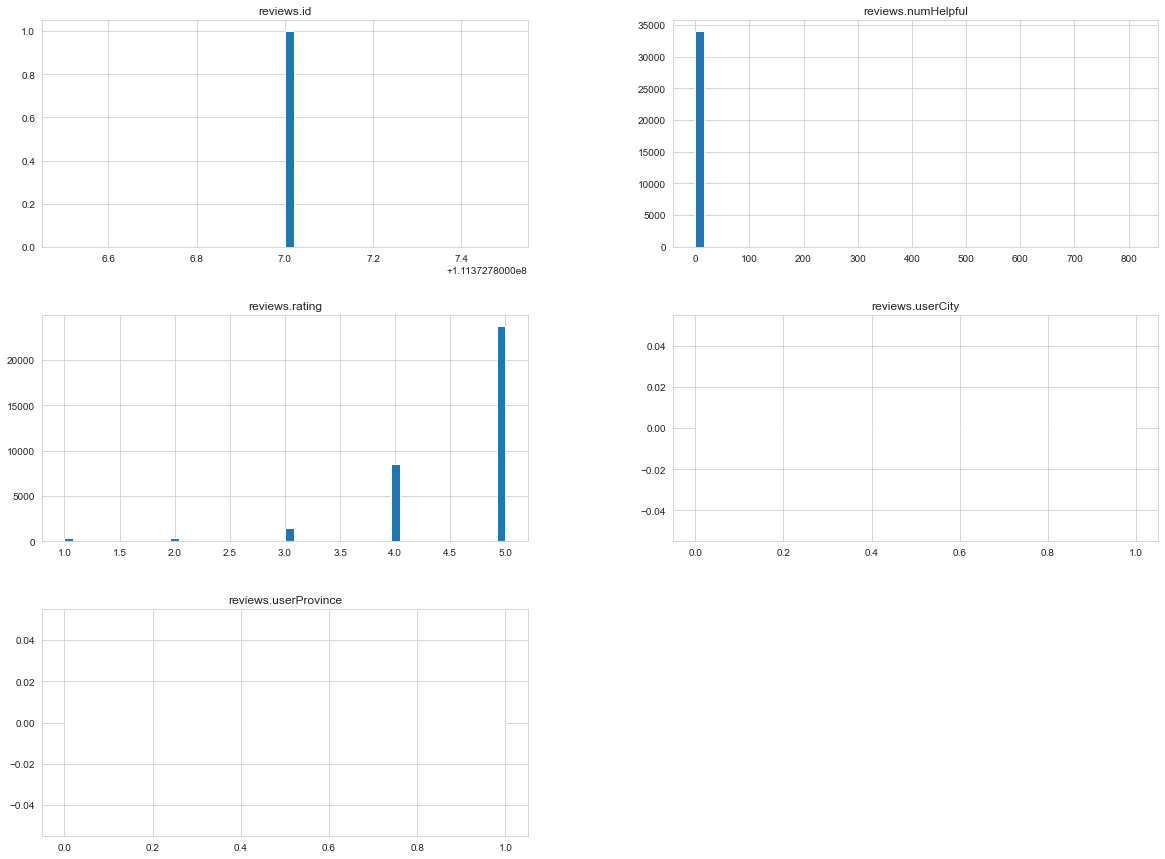

In [10]:
# Building histogram 
data.hist(bins=50, figsize=(20,15))
plt.show()

Based on the distributions above:

<B> reviews.numHelpful:</B> We want to weight reviews that had more than 50+ people who find them helpful. <br>
<B> reviews.rating: </B> Majority were highly rated (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined.

# 4. Spliting the data into Train/Test

* Spliting the data into training set and test set. 
* Our goal is to eventually train a sentiment analysis classifier.
* Since the majority of reviews are positive (5 stars), we need to do a stratified split on the reviews score to ensure that we don’t train the classifier on imbalanced data.
* To use sklearn’s <B> Stratified ShuffleSplit class </B>, removing all samples that have NAN in reviews score, then coverting all the reviews scores to integer datatype. <br>

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
print("Before: {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])

Before: 34660


In [13]:
# Removes all NAN in reviews.rating
print("After: {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

After: 34627


In [14]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

## 4.1. Checking to see if train/test sets were stratified proportionately in comparison to the raw data.

In [15]:
len(strat_train)

27701

In [16]:
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5.0    0.686004
4.0    0.245551
3.0    0.044042
1.0    0.011769
2.0    0.011696
Name: reviews.rating, dtype: float64

In [17]:
len(strat_test)

6926

In [18]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.686543
4.0    0.250650
3.0    0.039994
2.0    0.011118
1.0    0.010684
Name: reviews.rating, dtype: float64

# 5. Exploring the Training Set 

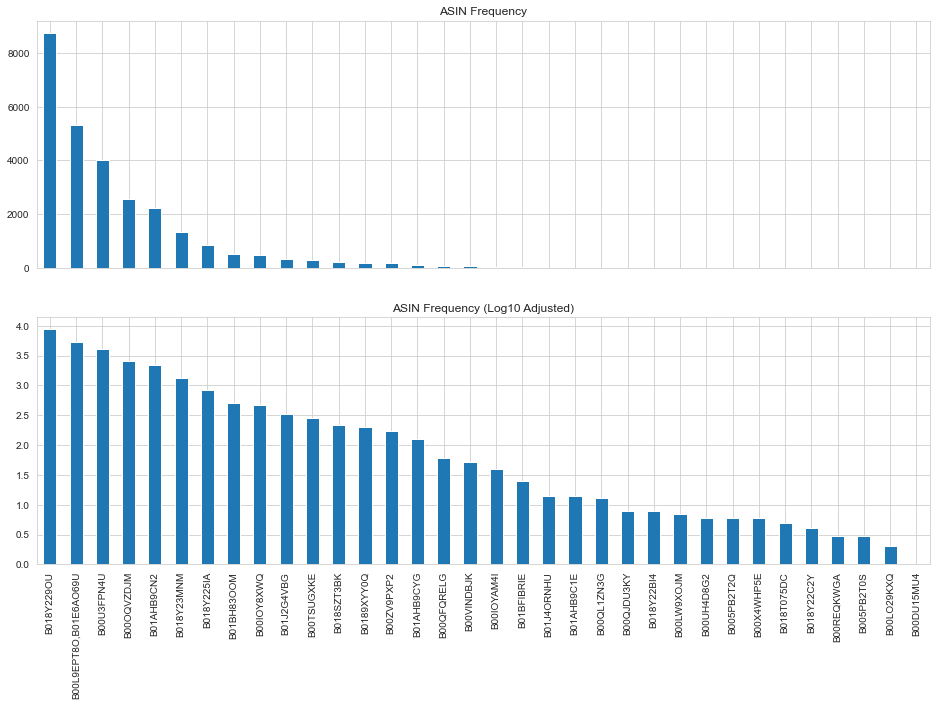

In [19]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
strat_train["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(strat_train["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

* Based on the bar graph for ASINs, we see that certain products have more reviews than other products, which indicate those  products have higher sales.
* We also see that the ASINs have a "right tailed" distribution which can also suggest that certain products have higher sales which can correlate to the higher ASINs frequencies in the strat_train.
* We also took the log of the ASINs to normalize the data, in order display an in-depth picture of each ASINs, and we see that the distribution still follows a "right tailed" distribution.
* From this we can say that certain ASINs (products) have better sales, while other ASINs have lower sale, and we can also say which products can be kept or dropped.

In [20]:
# training dataset average rating
strat_train["reviews.rating"].mean()

4.5838121047877145

## 5.1. reviews.rating of ASINs

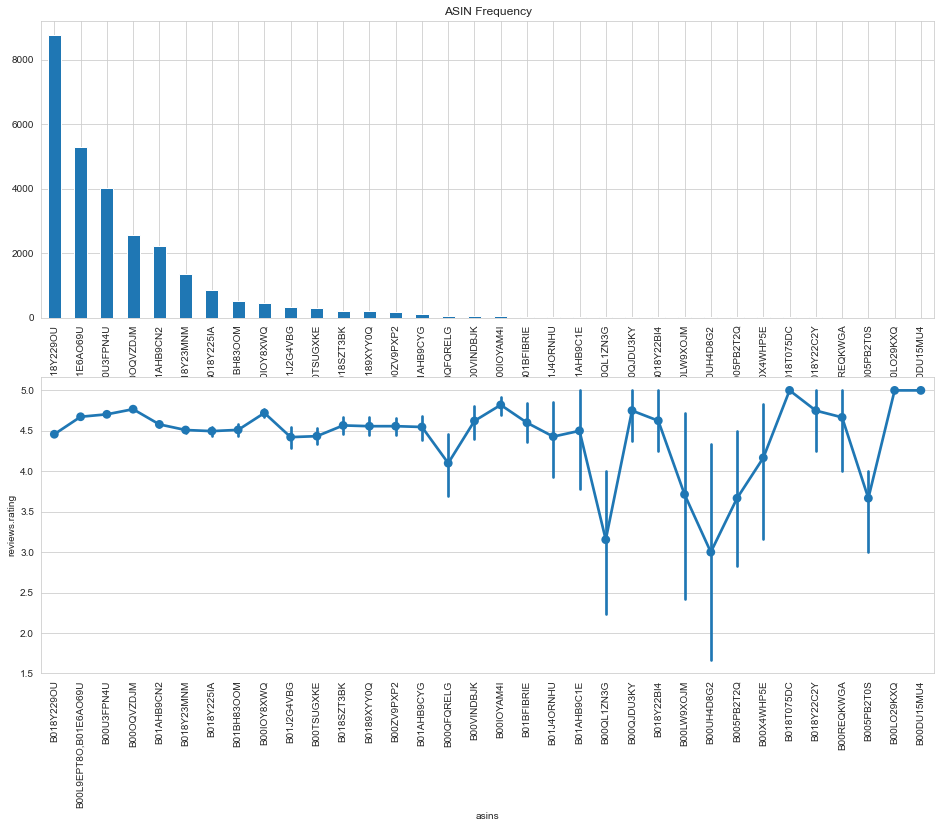

In [21]:
asins_count_ix = strat_train["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
strat_train["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=strat_train)
plt.xticks(rotation=90)
plt.show()

<B> The point-plot graph here automatically takes the average(mean) of the review.rating data. </B>

Based on the above graphs:

* The most frequently reviewed products have their average review ratings in the range of 4.5 - 4.8, with little variance (vertical lines in the point-plot graph).
* Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews.

* For ASINs with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we can say that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance.
* On the other hand, due to their lower frequencies for ASINs with lower frequencies, we can say that this is a result of lower quality products.
* Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we do not consider the significance of these review ratings due to lower frequency.

## 5.2. reviews.doRecommend of ASINs


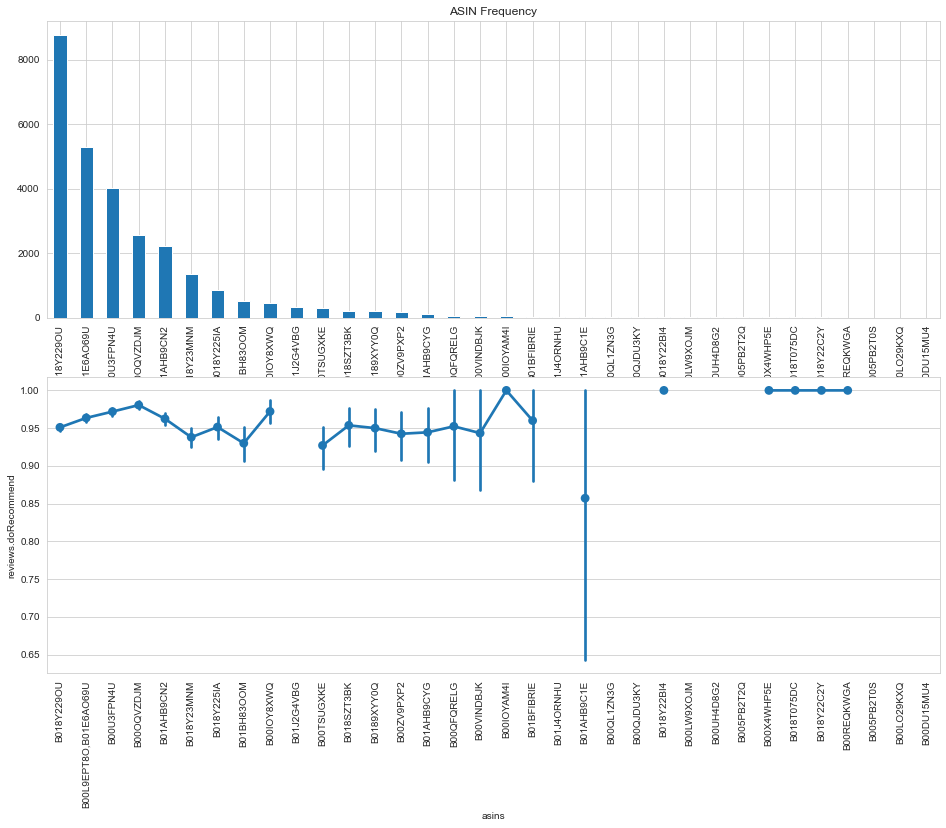

In [22]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
strat_train["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=strat_train)
plt.xticks(rotation=90)
plt.show()

* From this analysis, we can see that the first 19 ASINs show that consumers recommend the product, which is consistent with the "reviews.rating of ASINs" analysis above, where the first 19 ASINs have good ratings between 4.0 to 5.0
* The remaining ASINs have fluctuating results due to lower sample size, which are not considered.

## 5.3. Scatter plot for best rated products

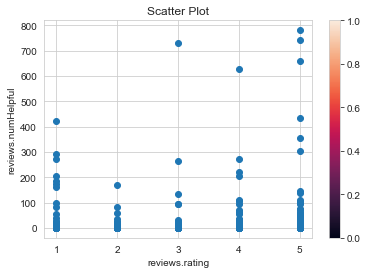

In [23]:
import matplotlib.pyplot as plt

plt.scatter(strat_train['reviews.rating'], strat_train['reviews.numHelpful'])
plt.title("Scatter Plot")
plt.xlabel('reviews.rating')
plt.ylabel('reviews.numHelpful')
plt.colorbar()
plt.show()

* Scatter plot for best rating of a product found by maximum votes by customers.

## 5.4. Histogram for target class

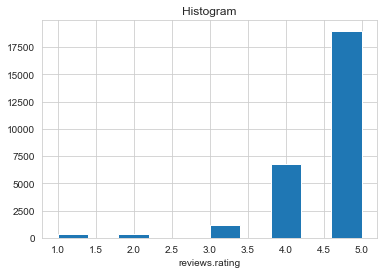

In [24]:
plt.hist(strat_train['reviews.rating'])
plt.title("Histogram")  
plt.xlabel('reviews.rating', fontsize = 10)
plt.show()

* Histogram of the target class(reviews.rating) which allows to see the frequency distribution of the data set.

# 6. Correlations 
## 6.1. Analyzing reviews.ratings with asins

In [25]:
corr_matrix = strat_train.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.048456,NaN,NaN
reviews.rating,NaN,-0.048456,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [26]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 30412 to 26045
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27675 non-null  object 
 1   name                  22311 non-null  object 
 2   asins                 27673 non-null  object 
 3   brand                 27675 non-null  object 
 4   categories            27675 non-null  object 
 5   keys                  27675 non-null  object 
 6   manufacturer          27675 non-null  object 
 7   reviews.date          27658 non-null  object 
 8   reviews.dateAdded     19207 non-null  object 
 9   reviews.dateSeen      27675 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27249 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27298 non-null  float64
 14  reviews.rating        27675 non-null  float64
 15  reviews.sourceU

In [27]:
counts = strat_train["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8757
"B00L9EPT8O,B01E6AO69U",5301
B00U3FPN4U,4021
B00OQVZDJM,2572
B01AHB9CN2,2233


In [28]:
avg_rating = strat_train.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,3.666667
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOY8XWQ,4.721030
B00IOYAM4I,4.820513


In [29]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8757,4.457805
"B00L9EPT8O,B01E6AO69U",5301,4.674024
B00U3FPN4U,4021,4.704054
B00OQVZDJM,2572,4.767496
B01AHB9CN2,2233,4.579489
B018Y23MNM,1353,4.509978
B018Y225IA,844,4.496445
B01BH83OOM,516,4.511628
B00IOY8XWQ,466,4.721030
B01J2G4VBG,327,4.422018


## 6.2. reviews.rating Vs ASINS

,asins,reviews.rating
asins,1.000000,0.142988
reviews.rating,0.142988,1.000000


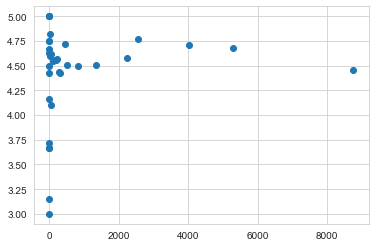

In [30]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

* From our analysis in data exploration above between ASINs and reviews.rating, we discovered that there are many ASINs with low occurrence that have high variances, as a result we concluded that these low occurrence ASINs are not significant in our analysis given the low sample size.

* Similarly in our correlation analysis between ASINs and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

# 7. Sentiment Analysis 

Using the features in place, we will build a classifier that can determine a review's sentiment.

## 7.1. Set Target Variable (Sentiments) 

Segregating ratings from 1-5 into positive, neutral, and negative.

In [31]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Adding sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

30412    Positive
19829    Positive
20033    Positive
16311    Positive
13267    Positive
15668    Positive
25718    Positive
6906      Neutral
10887    Positive
28660    Negative
10055    Positive
23500    Positive
9758     Positive
2949     Positive
25392    Positive
9024     Positive
27743    Positive
2602     Positive
835      Positive
29942    Positive
Name: Sentiment, dtype: object

In [32]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


* There are 27,701 training samples and 6926 testing samples.

### 7.1.2. Sentiment of a sentence from the reviews.text column

In [33]:
Review_text = data['reviews.text'].values[0]
print(Review_text)

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.


In [34]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [35]:
from textblob import TextBlob
blob = TextBlob(Review_text)

In [36]:
blob.sentiment

Sentiment(polarity=0.325, subjectivity=0.7833333333333333)

* polarity is the sentiment — from -1.0 (negative) to 1.0 (positive) with 0.0 being neutral.
* subjectivity is a value from 0.0 (objective) to 1.0 (subjective).

## 7.2 Extracting the Features

Here we are converting the content into numerical feature vectors using the Bag of Words strategy:

* Assigning fixed integer id to each word occurrence (integer indices to word occurrence dictionary).
* X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set).

In order to implement the Bag of Words strategy, we are using SciKit-Learn's CountVectorizer to performs the following:

Text preprocessing:
* Tokenization (breaking sentences into words)
* Stopwords (filtering "the", "are", etc)
* Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
* Feature Vector (converts the dictionary of text documents into a feature vector)

In [37]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12493)

Here we have 27,701 training samples and 12,526 distinct words in our training sample.

Also, with longer documents, we see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we are using TfidfTransformer to reduce this redundancy:

* Term Frequencies (Tf) divides number of occurrences for each word by total number of words.
* Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc).

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12493)

## 7.3. Multinominal Naive Bayes as Classifier for the Extracted Features

* Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i.
* Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier.

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## 7.4.  Test Model

In [40]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.937048801617095

* Here we see that the Multinominal Naive Bayes Classifier has a 93.45% accuracy level based on the features.

Next we do the following:
* Test other models.
* Fine tune the best models to avoid over-fitting.

## 7.5. Testing Other Models

<B> Logistic Regression Classifier </B>

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9392145538550389

<B> Support Vector Machine Classifier </B>

In [42]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9382038694773318

<B> Random Forest Classifier </B>

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.937770719029743

<B> Decision Tree Classifier </B>

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9057175859081721

* From the above it looks like all the models performed very well (as they are >90%).
* But for our dataset the Support Vector Machine Classifier performed best since Support Vector Machines is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

## 7.6. Analysis of Support Vector Machine Classifier

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, 
                            predictedLinearSVC))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedLinearSVC)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
    Negative       0.52      0.23      0.31       151
     Neutral       0.32      0.08      0.13       277
    Positive       0.95      0.99      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.45      0.33      0.35      6926
weighted avg       0.91      0.94      0.92      6926

Accuracy: 0.9382038694773318


Summary of the classification report:

* Precision: determines how many objects selected were correct.
* Recall: tells you how many of the objects that should have been selected were actually selected.
* F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise).
* Support is the number of occurrences of each class.

* The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report.
* Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

# 8. Conclusion

In conclusion, although we need more data to balance out the lower rated products to consider their significance, however we were still able to successfully associate positive, neutral and negative sentiments for each product in Amazon’s Catalog.

The data is a sample and is fairly normally distributed. The descriptive statistics do an adequate job describing the data. The average Product rating in amazon dataset is 4.5.

Data visualization helped to communicate a data set clearly and effectively by using graphics and made it easy to comprehend data at a glance.

Based on data visualization clearly we can recommend highest target (reviews.rating) of product to the users.

The result of positively skewed dataset is consistent with both our data exploration and sentiment analysis. Therefore, we conclude that the products in this dataset are generally positively rated.

Despite the skewed dataset, we were still able to build a robust Sentiment Analysis machine learning system to determine if the reviews are positive or negative. This is possible as the machine learning system was able to learn from all the positive, neutral and negative reviews.